In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.stats import nbinom
import seaborn as sns
from statsmodels.iolib.summary2 import summary_col

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\joako\\Desktop\\python\\Tarea1_\\data\\machine_failure_data.csv")
data['Failure_today'] = data['Failure_today'].apply(lambda x: 0 if x in ['No'] else 1)
Grados = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90,
    'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 'S': 180,
    'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270,
    'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

data['Parameter1_Dir'] = data['Parameter1_Dir'].map(Grados)
data['Parameter2_9am'] = data['Parameter2_9am'].map(Grados)
data['Parameter2_3pm'] = data['Parameter2_3pm'].map(Grados)
data['Date'] = pd.to_datetime(data['Date'], format='mixed', dayfirst=False, errors='coerce')

for i in data.columns:
    if data[i].dtype in ['float64', 'int64']:  
        media = data[i].mean()
        data[i] = data[i].fillna(media)

corr = data.corr()

In [3]:
data.describe()

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Failure_today
count,142193,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,2013-04-01 00:28:51.730816512,24.740655,12.186400,23.226784,2.349974,5.469824,7.624853,169.987675,39.984292,163.484340,...,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.231101
min,2007-11-01 00:00:00,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,2011-01-06 00:00:00,12.000000,7.600000,17.900000,0.000000,4.000000,7.624853,90.000000,31.000000,90.000000,...,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000
50%,2013-05-27 00:00:00,25.000000,12.000000,22.700000,0.000000,5.469824,7.624853,169.987675,39.000000,163.484340,...,18.637576,70.000000,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.800000,21.300000,0.000000
75%,2015-06-12 00:00:00,37.000000,16.800000,28.200000,0.800000,5.469824,8.700000,247.500000,46.000000,247.500000,...,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.000000
max,2017-06-25 00:00:00,49.000000,33.900000,48.100000,371.000000,145.000000,14.500000,337.500000,135.000000,337.500000,...,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000
std,NaN,14.237503,6.388924,7.109554,8.423217,3.168114,2.734927,97.494047,13.138385,101.186501,...,8.721551,18.932077,20.532065,6.746248,6.681788,2.278080,2.104709,6.472166,6.870771,0.421539


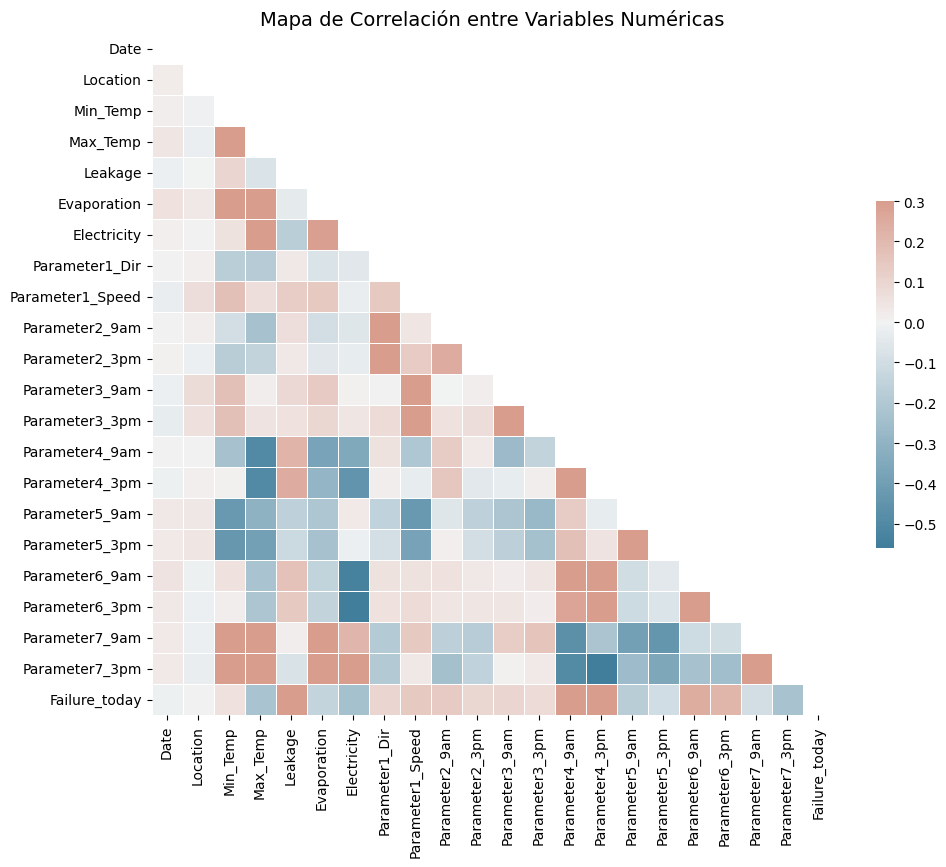

In [4]:

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Mapa de Correlación entre Variables Numéricas", fontsize=14)
plt.show()


# **Pregunta 1** 
#### Cargar la base de datos en el ambiente. Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario.

R: Cargue los datos, vizualice y trabaje algunas columnas ya que no todas se podian trabajar de inmediato al no ser int o float, ademas realice el siguiente cambio en la variable 'Failure_today'
1 : fallo
0 : no fallo
En vez de eliminar los valores nulos, reemplace estos por la media de la columna a la que corresponde este valor nulo.
Podemos ver la estadistica descriptiva y la matriz de correlacion.

In [5]:
#Ejecute
y = data['Failure_today']
x = data[['Leakage',
    'Parameter4_3pm',
    'Parameter6_9am',
    'Parameter6_3pm',
    'Electricity',
    'Max_Temp'
]]

x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit(cov_type='HC0')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Failure_today   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     5399.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:19:57   Log-Likelihood:                -51756.
No. Observations:              142193   AIC:                         1.035e+05
Df Residuals:                  142186   BIC:                         1.036e+05
Df Model:                           6                                         
Covariance Type:                  HC0                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0409      0.008      5.

# **Pregunta 2** 
#### Ejecute un modelo de probabilidad lineal (MCO) que permita explicar la probabilidad de que un dia se reporte fallo medido por sensor, a partir de las informacion disponible. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.

R: Gracias a la matriz de correlacion pude ver que las variables que mas se destacaban (positiva o negativamente) con 'Failure_today' eran 
  'Leakage', 'electricity', 'max_temp' y los parametros 4 y 6. Por esto decidi incluir estas variables en el modelo.
  obteniendo que un 32.9% de la vairabilidad de 'Failure_today' es esxplicada por el modelo.
  Ademas por los valores p podemos ver que los coeficientes son estadisticamente significativos.
  


In [6]:
#Ejecute Probit
x_probit = data[['Leakage',
    'Parameter4_3pm',
    'Electricity',
    'Max_Temp'
]]
model_probit = sm.Probit(y,x_probit)
probit_model = model_probit.fit(cov_type='HC0')
print(probit_model.summary())
mfxp = probit_model.get_margeff()
print(mfxp.summary())

Optimization terminated successfully.
         Current function value: 0.015199
         Iterations 15
                          Probit Regression Results                           
Dep. Variable:          Failure_today   No. Observations:               142193
Model:                         Probit   Df Residuals:                   142189
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Apr 2025   Pseudo R-squ.:                  0.9719
Time:                        04:19:58   Log-Likelihood:                -2161.1
converged:                       True   LL-Null:                       -76870.
Covariance Type:                  HC0   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Leakage            7.1389      0.130     54.929      0.000       6.884       7.394
Parameter4_3pm  

# **Pregunta 3** 
#### Ejecute un modelo probit para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.

R: Para este modelo solo me quede con las variables 'Leakage', 'Parameter4_3pm', 'Electricity', 'Max_Temp'.
Se obtuvo un PseudoRcudadrado bastante alto (0.97) 
En lo personal lo mas relevante que nos entrego el modelo probit es ver el gran impacto que tiene 'Leakage' sobre la ocurrencia de fallas.


In [7]:
#Ejecute Logit
x_logit = data[['Leakage',
    'Parameter4_3pm',
    'Parameter6_9am',
    'Parameter6_3pm',
    'Electricity',
    'Max_Temp'
]]
model_logit = sm.Logit(y, x_logit)
logit_model = model_logit.fit(cov_type='HC0')
print(logit_model.summary())

mfxl = logit_model.get_margeff()
print(mfxl.summary())

# Odds Ratios (Logit)
params = logit_model.params
conf = logit_model.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print("Odds Ratios")
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.012998
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:          Failure_today   No. Observations:               142193
Model:                          Logit   Df Residuals:                   142187
Method:                           MLE   Df Model:                            5
Date:                Sat, 26 Apr 2025   Pseudo R-squ.:                  0.9760
Time:                        04:19:59   Log-Likelihood:                -1848.3
converged:                       True   LL-Null:                       -76870.
Covariance Type:                  HC0   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Leakage           15.0011      0.308     48.653      0.000      14.397      15.605
Parameter4_3pm  

# **Pregunta 4** 
#### Ejecute un modelo logit para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.
R: Como podemos ver el modelo logit permite explicar la probabilidad de que se reporte un fallo. Una vez mas Leakage es el factor principal de los fallos. 

# **Pregunta 5** 
#### Comente los resultados obtenidos en 2, 3 y 4. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?
R: Los modelos Probit y Logitestan diseñados para trabajar con variables binarias, caso contrario el de MCO.
Ademas comparando los resultados obtenidos Tanto probit como logit logramos valor bastante altos en el Pseudo R Cuadrado. Siendo este ultimo modelo el que a mi parecer es el mas adecuado para la pregunta de investigacion ya que interpreta de forma clara como cambian las probabilidades.
Las variables mas robustas fueron  'Leakage', 'Parameter4_3pm', 'Electricity', 'Max_Temp'.



In [8]:
data['Mes'] = data['Date'].dt.to_period('M')
PromedioxMes = data.groupby('Mes').mean(numeric_only=True)
fallosxMes = data.groupby('Mes')['Failure_today'].sum()
PromedioxMes['conteo_de_fallos'] = fallosxMes
PromedioxMes['conteo_de_fallos'] = PromedioxMes['conteo_de_fallos'].fillna(0)
x_poisson = ['Leakage',
    'Parameter4_3pm',
    'Electricity',
    'Max_Temp']

x10 = sm.add_constant(PromedioxMes[x_poisson])

y_poisson = PromedioxMes['conteo_de_fallos']
poisson_model = sm.GLM(y_poisson, x10, family=sm.families.Poisson())
poisson_results = poisson_model.fit()
print(poisson_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       conteo_de_fallos   No. Observations:                  113
Model:                            GLM   Df Residuals:                      108
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3119.0
Date:                Sat, 26 Apr 2025   Deviance:                       5415.8
Time:                        04:19:59   Pearson chi2:                 3.82e+03
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.8937      0.238     -3.

# **Pregunta 6** 
#### Agregue la data a nivel mensual, usando la data promedio de las variables (ignorando aquellas categoricas, como la direccion del viento). En particular, genere una variable que cuente la cantidad de fallos observados en un mes, utilice un valor de 0 si en ese mes no se reporto fallos en ningun dia. Use un modelo Poisson para explicar el numero de fallas por mes. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.


R: como podemos ver el modelo es altamente significativo segun los valores entregados.
Personalmente me causa ruido que en este modelo entregue coeficiente negativo para Leakage y positivo para el resto de las variables, lo cual me hace dudar de mi interpretacion.


<Axes: xlabel='plambda', ylabel='Count'>

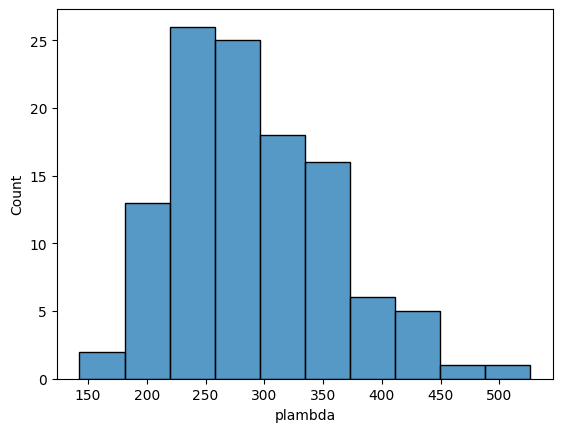

In [9]:
PromedioxMes['plambda'] = poisson_model.mu
sns.histplot(data=PromedioxMes, x="plambda")

In [10]:
alpha = (y.var() - y.mean()) / (y.mean() ** 2)
print(f"Alpha estimado: {alpha}")


Alpha estimado: -0.9999766013201932


In [11]:
negbin=sm.GLM(y_poisson,x10,family=sm.families.NegativeBinomial(alpha=0.8)).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       conteo_de_fallos   No. Observations:                  113
Model:                            GLM   Df Residuals:                      108
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -741.91
Date:                Sat, 26 Apr 2025   Deviance:                       56.461
Time:                        04:19:59   Pearson chi2:                     20.7
No. Iterations:                    10   Pseudo R-squ. (CS):            0.07689
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.0738      3.475     -0.

# **Pregunta 8** 
#### Usando la informacion anterior, ejecute un modelo Binomial Negativa para responder a la pregunta 6. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.

R: El parametro 4_3opm es el que mejor explica las fallas mensuales y en este caso el modelo binomial negativo entrega mejores resultados que el modelo de poisson.




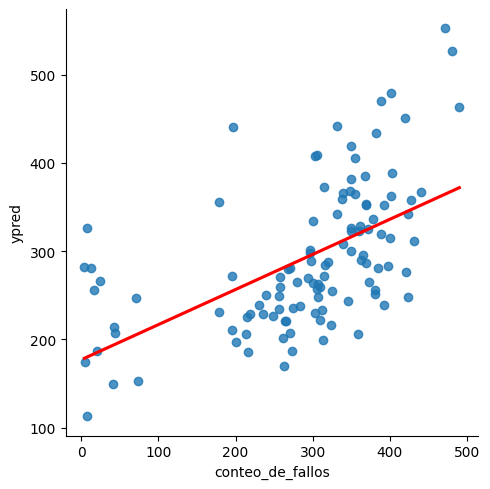

In [12]:
PromedioxMes['ypred'] = negbin.predict(x10)
sns.lmplot(data=PromedioxMes, x='conteo_de_fallos', y = 'ypred', ci= None, line_kws={'color': 'red'})
plt.show()

# **Pregunta 9** 

#### Comente los resultados obtenidos en 6, 7 y 8. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?
R: En mi opinion el modelo binomial negativo es el mas adeucado para responder este trabajo, ya que modela correctamente los datos de conteo con sobredispersion y ofrece estimaciones mas robustas y confiables.

